In [62]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
all_df = pd.read_csv("Clean_eyes.csv")

In [75]:
all_df[all_df['Wire ID']==3560].head()

,Wire ID,Meas_type,Gauge,Board_type,D1,D0,CMD0
0,3560,1,34,0,157.95,165.08,132.17
10,3560,0,34,0,294.75,313.90,281.61
20,3560,1,34,1,221.40,234.40,221.64
30,3560,0,34,1,412.36,475.22,484.41


In [69]:
lboard_df = all_df[all_df['Board_type']==0].copy()
yboard_df = all_df[all_df['Board_type']==1].copy()

In [72]:
X_sample = lboard_df[['D0','D1','CMD0']].values
X_sample.flatten()

array([165.08, 157.95, 132.17, 160.92, 145.38, 144.02, 165.25, 147.55,
       137.32, 130.46, 146.1 , 127.01, 152.2 , 145.95, 142.82, 173.6 ,
       182.89, 178.12, 167.75, 170.66, 167.15, 165.25, 164.83, 140.24,
       170.34, 152.42, 148.74, 187.15, 140.07, 174.68, 313.9 , 294.75,
       281.61, 315.01, 356.32, 253.98, 364.25, 340.48, 240.57, 403.75,
       322.21, 262.98, 340.81, 199.29, 204.06, 388.76, 329.28, 242.65,
       360.92, 338.26, 250.94, 462.06, 432.83, 340.23, 402.98, 454.68,
       278.53, 397.45, 378.54, 239.62])

In [73]:
Y_sample = yboard_df[['D0','D1','CMD0']].values
Y_sample.flatten()

array([234.4 , 221.4 , 221.64, 232.  , 205.71, 221.35, 223.7 , 198.97,
       217.61, 226.77, 212.24, 204.13, 219.97, 215.85, 203.76, 274.37,
       257.75, 261.38, 254.71, 263.58, 261.05, 273.93, 259.65, 240.93,
       270.95, 239.65, 248.53, 255.77, 233.29, 222.78, 475.22, 412.36,
       484.41, 485.46, 415.79, 476.93, 442.06, 409.26, 379.88, 437.16,
       420.33, 453.68, 396.78, 425.59, 455.57, 491.04, 496.09, 511.97,
       485.45, 477.47, 466.37, 475.78, 463.3 , 438.53, 497.69, 459.36,
       465.57, 454.28, 480.68, 452.34])

In [76]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sample, Y_sample, test_size=0.2, random_state=42)

In [77]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [78]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 4690.841535904841
Root Mean Squared Error: 68.4897184685763
R-squared: 0.7175484158269435


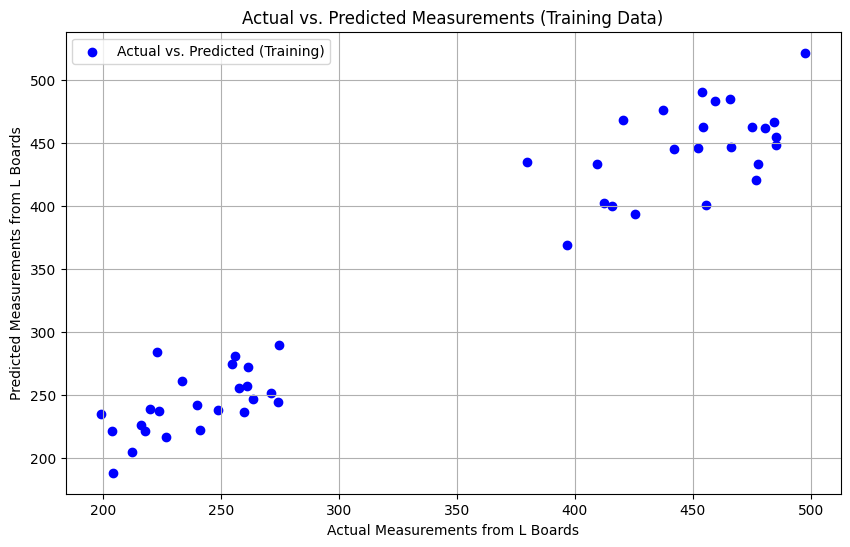

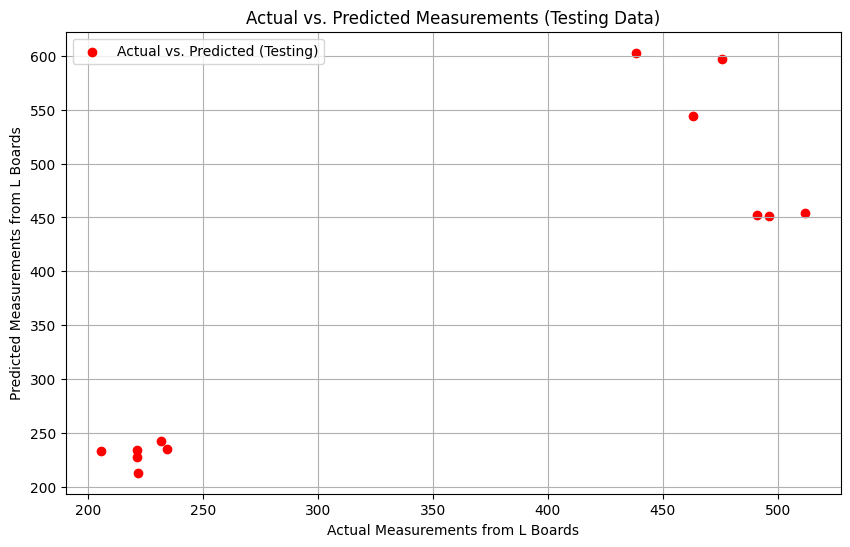

In [79]:
import matplotlib.pyplot as plt

# Scatter plot for training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, model.predict(X_train), color='blue', label='Actual vs. Predicted (Training)')
plt.xlabel('Actual Measurements from L Boards')
plt.ylabel('Predicted Measurements from L Boards')
plt.title('Actual vs. Predicted Measurements (Training Data)')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for testing data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, model.predict(X_test), color='red', label='Actual vs. Predicted (Testing)')
plt.xlabel('Actual Measurements from L Boards')
plt.ylabel('Predicted Measurements from L Boards')
plt.title('Actual vs. Predicted Measurements (Testing Data)')
plt.legend()
plt.grid(True)
plt.show()